# Minor Project

In [1]:
# importing general libraries

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

## Preprocessing

In [2]:
# importing libraries required for preprocessing

from skimage.io import imread
from skimage.transform import resize
from PIL import ImageFile

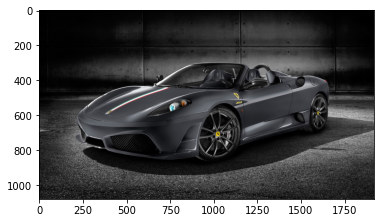

In [3]:
# Displaying the image

# Ref Path : /content/drive/MyDrive/Machine Learning/Minor Project/images

img = plt.imread('/content/drive/MyDrive/Machine Learning/Minor Project/images/Car/hd car wallpapers for mobile (26).jpg')
plt.imshow(img)

In [4]:
# image shape
img.shape

(1080, 1920, 3)

In [5]:
# Support Vector Machine

ImageFile.LOAD_TRUNCATED_IMAGES = True

dir_path = '/content/drive/MyDrive/Machine Learning/Minor Project/images'

categories = ['Bike','Car'] # folder names
target = []
images = []
flat_data = []

for category in categories:
  cat_num = categories.index(category)
  path = os.path.join(dir_path, category)

  for img in os.listdir(path):
    if not img.startswith('.'):
      img_array = imread(os.path.join(path,img))
      img_resized = resize(img_array,(150,150,3))
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(cat_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [6]:
flat_data[0]

array([1.        , 0.99803922, 0.16601307, ..., 1.        , 0.99803922,
       0.16601307])

In [7]:
# creating dataframe

df = pd.DataFrame(flat_data)
df['Target'] = target

In [8]:
# dataframe head

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,...,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,1.000000,0.998039,0.166013,0
1,0.007843,0.005882,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.001961,0.000000,0.003922,0.001961,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.003922,0.003922,0.000654,0.003922,0.002941,0.000327,0.003922,0.003922,0.000654,0.003922,0.002941,0.000327,0.003922,0.002941,0.000327,0.003922,0.003922,0.000654,0.003922,0.002941,0.000327,0.003922,0.003431,0.000490,0.003922,0.003922,0.000654,0.003922,0.002941,0.000327,0.003922,0.003922,0.000654,0.003922,0.003922,0.000654,0.003922,0.001961,0.000000,0
2,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,...,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0
3,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,...,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0
4,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,...,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0.996078,0.994118,0.165359,0


In [9]:
# dataframe tail

df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
52,0.649564,0.581808,0.554357,0.741830,0.652941,0.637582,0.822331,0.709150,0.704684,0.533333,0.456972,0.437908,0.134967,0.115359,0.093791,0.266013,0.223529,0.211111,0.656209,0.575163,0.566667,0.837255,0.721242,0.724183,0.605229,0.533987,0.512200,0.243900,0.212418,0.188344,0.130392,0.100654,0.088889,0.290741,0.251525,0.242484,0.616231,0.538562,0.530065,0.554248,...,0.176471,0.152941,0.168627,0.171895,0.149020,0.164706,0.167974,0.149020,0.162418,0.160784,0.141176,0.156863,0.160784,0.140523,0.156209,0.154575,0.137255,0.150654,0.145098,0.133333,0.145098,0.141176,0.129956,0.145098,0.145098,0.125490,0.141176,0.136601,0.121569,0.137255,0.137255,0.121569,0.136710,0.129412,0.117320,0.129412,0.117647,0.109804,0.121569,1
53,0.140915,0.059477,0.028497,0.118170,0.062745,0.032484,0.058824,0.057625,0.024074,0.050196,0.049542,0.026013,0.087647,0.087320,0.089804,0.220109,0.233290,0.260087,0.191351,0.203137,0.225338,0.200980,0.210458,0.241503,0.142898,0.155294,0.178061,0.132157,0.138954,0.152418,0.078366,0.081699,0.077386,0.120654,0.122505,0.117146,0.101852,0.101852,0.097930,0.011961,...,0.860131,0.820915,0.769935,0.865251,0.829956,0.782898,0.873856,0.838954,0.799673,0.863028,0.817756,0.772832,0.873965,0.834641,0.791634,0.851634,0.808824,0.761438,0.870719,0.834662,0.791634,0.871634,0.821307,0.768105,0.861765,0.808497,0.749739,0.841176,0.799891,0.747712,0.856863,0.814270,0.767865,0.858824,0.816340,0.762092,0.882614,0.847320,0.800261,1
54,0.700196,0.721569,0.694314,0.694118,0.717647,0.686275,0.687255,0.711765,0.682353,0.686275,0.709804,0.678431,0.692157,0.705686,0.678431,0.684314,0.701961,0.678431,0.682353,0.701961,0.676471,0.684314,0.703922,0.674510,0.692157,0.705882,0.680392,0.688235,0.713725,0.684314,0.696078,0.715686,0.692157,0.705882,0.717647,0.694118,0.708824,0.716667,0.690196,0.715686,...,0.168627,0.164706,0.156863,0.190784,0.184902,0.175098,0.181961,0.170392,0.166471,0.162745,0.156863,0.150980,0.163529,0.159608,0.151765,0.203922,0.200000,0.192157,0.190784,0.184902,0.176471,0.213725,0.208039,0.204118,0.215490,0.207843,0.211765,0.259020,0.251176,0.255098,0.266667,0.255882,0.259804,0.278431,0.269216,0.271765,0.280196,0.276471,0.278235,1
55,0.251195,0.278986,0.278646,0.311922,0.323686,0.327843,0.311135,0.326954,0.334899,0.301490,0.321098,0.332863,0.269594,0.290196,0.301961,0.314144,0.329830,0.341595,0.287268,0.302954,0.314719,0.334894,0.342737,0.358188,0.421327,0.440699,0.464117,0.365495,0.390175,0.408632,0.230389,0.260863,0.265876,0.165150,0.200209,0.200444,0.160824,0.196118,0.192392,0.160784,...,0.239255,0.235529,0.254902,0.247059,0.243371,0.254904,0.239922,0.243137,0.250980,0.239216,0.243137,0.250980,0.239216,0.239216,0.247059,0.244314,0.244314,0.252157,0.250980,0.250980,0.258824,0.250980,0.250980,0.258824,0.243948,0.243948,0.251791,0.239216,0.239216,0.243137,0.235427,0.235427,0.237516,0.239216,0.235294,0.235294,0.243137,0.235294,0.239216,1
56,0.283399,0.207952,0.196993,0.393464,0.299542,0.290065,0.355011,0.310458,0.301961,0.277386,0.238824,0.228257,0.270850,0.239412,0.231895,0.143399,0.125861,0.115948,0.059499,0.051634,0.036710,0.050000,0.043791,0.032026,0.067451,0.059608,0.047211,0.083377,0.075817,0.056209,0.183399,0.167712,0.148105,0.316514,0.289303,0.277538,0.265904,0.242484,0.222222,0.173791,...,0.332898,0.290850,0.262200,0.317407,0.276580,0.254662,0.298431,0.258824,0.243137,0.300392,0.263246,0.249129,0.330044,0.294118,0.259586,0.318301,0.275163,0.255556,0.282222,0.239085,0.227320,0.291765,0.248627,0.232941,0.285556,0.249673,0.230654,0.299216,0.263508,0.244314,0.281155,0.242484,0.227451,0.270588,0.231373,0.217320,0.279085,0.243791,0.224183,1


In [10]:
# Target

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# unique values

np.unique(target,return_counts=True)

(array([0, 1]), array([27, 30]))

<BarContainer object of 2 artists>

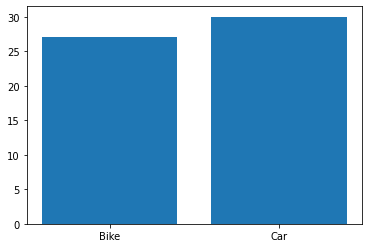

In [12]:
# unique value graph

unique, count = np.unique(target,return_counts=True)
plt.bar(categories,count)

## Model Training

In [13]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.30, random_state = 110)

In [14]:
# Support Vector Machine

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_params = [
        {'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
        {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.001, 0.0001]}
       ]

svc = SVC(probability = True)
clf = GridSearchCV(svc, grid_params)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
# predicted output

y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [16]:
# test output

y_test

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

## Accuracy Test

In [17]:
# importing required libraries

from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
# accuracy score

accuracy_score(y_pred, y_test) * 100

88.88888888888889

In [19]:
# confusion matrix

confusion_matrix(y_pred, y_test)

array([[ 6,  0],
       [ 2, 10]])

Enter the url : https://c.wallhere.com/photos/d1/98/2015_Bentley_Continental_GT3_concept_netcarshow_netcar_car_images_car_photo-378784.jpg!d
Percentage :  [[0.04071756 0.95928244]]
Predicted Output : Car


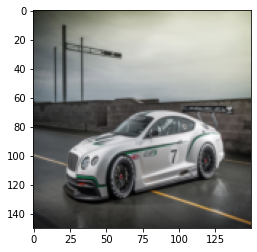

In [20]:
# Testing

data = []
url = input('Enter the url : ')
img = imread(url)
img_resized = resize(img,(150, 150))
data.append(img_resized.flatten())
data = np.array(data)
plt.imshow(img_resized)
y_out = clf.predict(data)
y_out2 = clf.predict_proba(data)
y_out = categories[y_out[0]]
print("Percentage : ", y_out2)
print(f'Predicted Output : {y_out}')

### Output

Enter the url : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpzO5cN6WOsn8R7iG0Nd8kQ3WAfO94XEziYQ&usqp=CAU
Bike [[0.97485046 0.02514954]]
Predicted Output : Bike


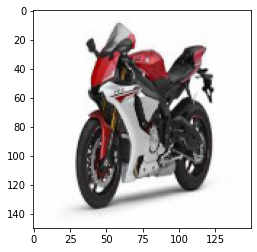

In [21]:
# Testing

data = []
url = input('Enter the url : ')
img = imread(url)
img_resized = resize(img,(150, 150))
data.append(img_resized.flatten())
data = np.array(data)
plt.imshow(img_resized)
y_out = clf.predict(data)
y_out2 = clf.predict_proba(data)
y_out = categories[y_out[0]]
print(y_out, y_out2)
print(f'Predicted Output : {y_out}')